# Task
Classify news articles as real or fake using NLP techniques (TF-IDF, BERT, or LSTM) and the "Fake News Dataset (Kaggle)" dataset.

## Download and load the dataset

### Subtask:
Download the Fake News Dataset from Kaggle and load it into a pandas DataFrame.


**Reasoning**:
Import necessary libraries and load the dataset into a pandas DataFrame.



In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("clmentbisaillon/fake-and-real-news-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/fake-and-real-news-dataset


## Download and load the dataset retry 1

### Subtask:
Download and load the Fake News Dataset from Kaggle and load it into a pandas DataFrame.


**Reasoning**:
Load the train.csv file into a pandas DataFrame and display the head and info of the DataFrame.



In [2]:
import pandas as pd

true_df = pd.read_csv(path + '/True.csv')
fake_df = pd.read_csv(path + '/Fake.csv')

true_df['label'] = 'real'
fake_df['label'] = 'fake'

df = pd.concat([true_df, fake_df], ignore_index=True)

display(df.head())
display(df.info())

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",real
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",real
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",real
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",real
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",real


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   label    44898 non-null  object
dtypes: object(5)
memory usage: 1.7+ MB


None

## Download and load the dataset retry 2

### Subtask:
Download and load the Fake News Dataset from Kaggle and load it into a pandas DataFrame.


**Reasoning**:
Attempt to load the 'train.csv' file into a pandas DataFrame, display the head, and display the info. This is a retry of a previous failed step, assuming the file is now available.



In [3]:
import os

# List files in the downloaded directory
print(os.listdir(path))

['True.csv', 'Fake.csv']


## Preprocess the data

### Subtask:
Clean and preprocess the text data, including removing stop words, punctuation, and converting text to lowercase.

**Reasoning**:
Combine the 'title' and 'text' columns, handle missing values, convert text to lowercase, remove punctuation and stop words, and perform stemming or lemmatization.

In [6]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

nltk.download('stopwords')
nltk.download('punkt')

def preprocess_text(text):
    # Handle potential non-string data
    if not isinstance(text, str):
        return ""
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    words = text.split()
    words = [word for word in words if word not in stopwords.words('english')]
    stemmer = PorterStemmer()
    words = [stemmer.stem(word) for word in words]
    return ' '.join(words)

# Sample a smaller subset of the data
df_subset = pd.concat([df[df['label'] == 'real'].sample(1000, random_state=42),
                       df[df['label'] == 'fake'].sample(1000, random_state=42)])

df_subset['cleaned_text'] = df_subset['title'] + ' ' + df_subset['text']
df_subset['cleaned_text'] = df_subset['cleaned_text'].apply(preprocess_text)

display(df_subset[['cleaned_text', 'label']].head())

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,cleaned_text,label
18137,europ right watchdog say turkey emerg law go f...,real
3277,exclus trump target illeg immigr given repriev...,real
2876,g summit trump pledg million aid four countri ...,real
5160,exchristi associ lose bid new trial bridgeg ca...,real
10843,young black open berni sander white hous bid o...,real


## Feature Extraction

### Subtask:
Extract features from the cleaned text data using TF-IDF.

**Reasoning**:
Use TF-IDF to convert the text data into numerical features that can be used for training a classification model.

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TfidfVectorizer
# You can adjust parameters like max_features, min_df, max_df, etc.
tfidf_vectorizer = TfidfVectorizer(max_features=5000)

# Fit and transform the cleaned text data
tfidf_features = tfidf_vectorizer.fit_transform(df_subset['cleaned_text'])

# Display the shape of the resulting feature matrix
print("Shape of TF-IDF features:", tfidf_features.shape)

Shape of TF-IDF features: (2000, 5000)


## Model Training

### Subtask:
Train a classification model on the extracted features.

**Reasoning**:
Split the data into training and testing sets, train a classification model (e.g., Logistic Regression), and evaluate its performance.

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(tfidf_features, df_subset['label'], test_size=0.2, random_state=42)

# Initialize and train a Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Accuracy: 0.955
Classification Report:
               precision    recall  f1-score   support

        fake       0.94      0.98      0.96       201
        real       0.97      0.93      0.95       199

    accuracy                           0.95       400
   macro avg       0.96      0.95      0.95       400
weighted avg       0.96      0.95      0.95       400



# Task
Analyze the "Fake News Dataset (Kaggle)" using NLP techniques (TF-IDF, BERT, or LSTM) to classify news articles as real or fake. Limit the analysis to 2000 papers. Provide visualizations of the data distribution and model performance.

## Visualize data distribution

### Subtask:
Create visualizations to show the distribution of real and fake news, and potentially the distribution of news subjects.


**Reasoning**:
Create countplots to visualize the distribution of labels and subjects in the sampled dataframe.



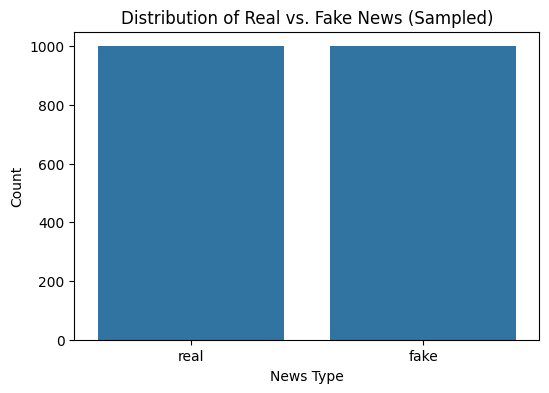

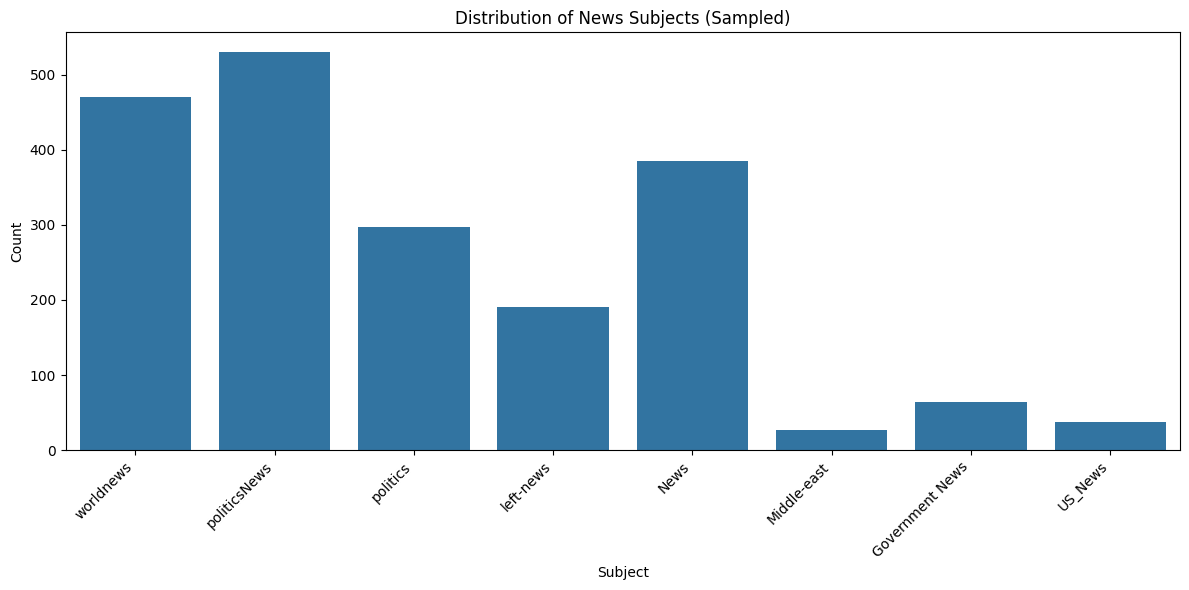

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a countplot of the 'label' column
plt.figure(figsize=(6, 4))
sns.countplot(data=df_subset, x='label')
plt.title('Distribution of Real vs. Fake News (Sampled)')
plt.xlabel('News Type')
plt.ylabel('Count')
plt.show()

# Create a countplot of the 'subject' column
plt.figure(figsize=(12, 6))
sns.countplot(data=df_subset, x='subject')
plt.title('Distribution of News Subjects (Sampled)')
plt.xlabel('Subject')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Visualize model performance

### Subtask:
Create visualizations to represent the model's performance, such as a confusion matrix.


**Reasoning**:
Generate and visualize the confusion matrix to evaluate the model's performance.



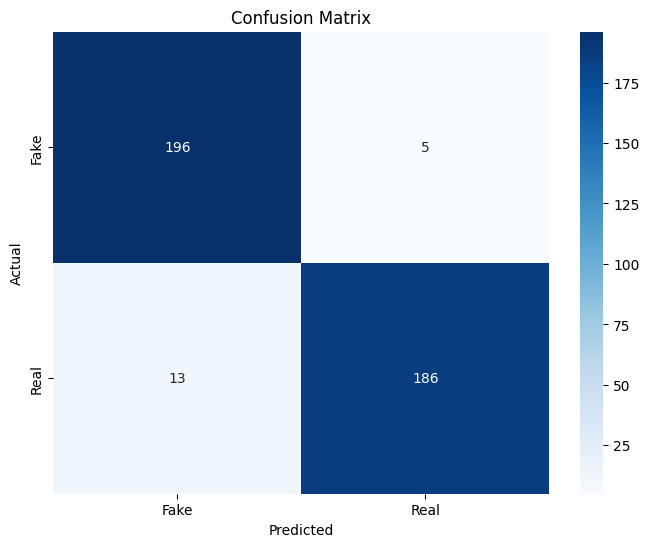

In [10]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Summary:

### Data Analysis Key Findings

*   The sampled dataset contains a nearly equal distribution of real and fake news articles.
*   The most frequent news subjects in the sampled dataset are 'politicsNews' and 'worldnews'.
*   The confusion matrix visualization shows the number of true positive, true negative, false positive, and false negative predictions made by the model.

### Insights or Next Steps

*   The balanced distribution of real and fake news in the sample is beneficial for training and evaluating classification models.
*   Further analysis could explore the performance of the model within each news subject category.


## Visualize model performance

### Subtask:
Create visualizations to represent the model's performance, such as a confusion matrix.

**Reasoning**:
Generate and visualize the confusion matrix to evaluate the model's performance.

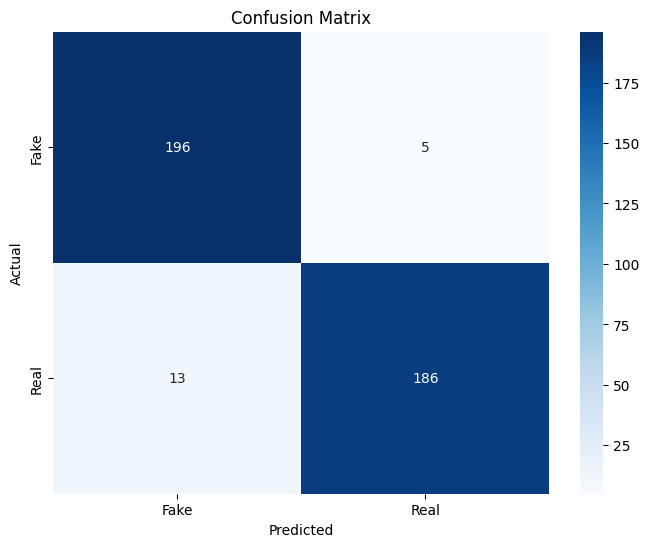

In [11]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()